In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split



In [2]:
# 数据集内容：每平方米价格，房间数，房价
# loading data
data = np.loadtxt('data1.txt',delimiter=',')
# npy: np.load_py
# excel: pd.read_excel
# csv: pd.read_csv

print(data.dtype)
num_feature = data.shape[1] - 1
data = data.astype('float32')
data

float64


array([[2.10400e+03, 3.00000e+00, 3.99900e+05],
       [1.60000e+03, 3.00000e+00, 3.29900e+05],
       [2.40000e+03, 3.00000e+00, 3.69000e+05],
       [1.41600e+03, 2.00000e+00, 2.32000e+05],
       [3.00000e+03, 4.00000e+00, 5.39900e+05],
       [1.98500e+03, 4.00000e+00, 2.99900e+05],
       [1.53400e+03, 3.00000e+00, 3.14900e+05],
       [1.42700e+03, 3.00000e+00, 1.98999e+05],
       [1.38000e+03, 3.00000e+00, 2.12000e+05],
       [1.49400e+03, 3.00000e+00, 2.42500e+05],
       [1.94000e+03, 4.00000e+00, 2.39999e+05],
       [2.00000e+03, 3.00000e+00, 3.47000e+05],
       [1.89000e+03, 3.00000e+00, 3.29999e+05],
       [4.47800e+03, 5.00000e+00, 6.99900e+05],
       [1.26800e+03, 3.00000e+00, 2.59900e+05],
       [2.30000e+03, 4.00000e+00, 4.49900e+05],
       [1.32000e+03, 2.00000e+00, 2.99900e+05],
       [1.23600e+03, 3.00000e+00, 1.99900e+05],
       [2.60900e+03, 4.00000e+00, 4.99998e+05],
       [3.03100e+03, 4.00000e+00, 5.99000e+05],
       [1.76700e+03, 3.00000e+00, 2.5290

In [3]:
# data normalization
data_norm = data.copy()#为了data_norm和data不相互影响，用了copy方法
maximum = np.max(data_norm,axis=0,keepdims=True) #对列求最大值
minimun = np.min(data_norm,axis=0,keepdims=True) #对列求最小值
print('maximum:{},minimun:{}'.format(maximum,minimun))
data_norm = (data_norm - minimun)/(maximum - minimun)#数据标准化，使其在0-1的区间内，使其在所有方向都比较平均
#print(data_norm)

maximum:[[4.478e+03 5.000e+00 6.999e+05]],minimun:[[8.520e+02 1.000e+00 1.699e+05]]


In [4]:
# train val split
#train_test_split提供了多样化的接口
data_train, data_test = train_test_split(data_norm, test_size=0.3, random_state=42)#训练集：测试集=7：3
X_train = data_train[:, :2] # 切片全部行和前两列
a=np.ones((X_train.shape[0],1))#返回给定形状和类型的新数组，并填充为1。
X_train = np.concatenate((X_train, np.ones((X_train.shape[0],1))), axis=1)#沿给定轴（行）连接一系列数组。用来表示偏移值b
y_train = data_train[:, 2]
X_test = data_test[:, :2]
X_test = np.concatenate((X_test, np.ones((X_test.shape[0],1))), axis=1)
y_test = data_test[:, 2]


In [5]:
# model init
w = np.random.rand(num_feature+1,1)#随机初始化权重w

# gradient descent 梯度下降
def L2_loss(y_pred,y):
    return np.mean(np.square(y_pred-y))

iterations = 10000
lr = 0.1


In [6]:
y_train.reshape(-1,1)

array([[1.        ],
       [0.05660377],
       [0.01886792],
       [0.5283019 ],
       [0.13698113],
       [0.24528302],
       [0.24528302],
       [0.2735849 ],
       [0.24528302],
       [0.43396226],
       [0.        ],
       [0.33962265],
       [0.24528302],
       [0.33415094],
       [0.21886793],
       [0.3018868 ],
       [0.3018868 ],
       [0.16056603],
       [0.3756604 ],
       [0.1509434 ],
       [0.16981132],
       [0.33037737],
       [0.13226226],
       [0.13773584],
       [0.6228264 ],
       [0.13132076],
       [0.15660377],
       [0.05490377],
       [0.2718868 ],
       [0.16981132],
       [0.57566035],
       [0.71528304]], dtype=float32)

In [7]:
log = []
for i in range(iterations):
    y_pred = np.matmul(X_train, w)#两个矩阵相乘：w1x1+w2x2+...+wnxn
    term = lr*np.mean((y_pred-y_train.reshape(-1,1))*X_train, #保证矩阵和矩阵运算，向量和向量运算
                      axis=0).reshape(-1,1) #对代价函数求偏导，计算其梯度下降的值
    w -= term #更新梯度
    loss = L2_loss(y_pred,y_train) #计算其损失值
    print('iter:{},loss:{}'.format(i,loss))
    log.append([i,loss])

iter:0,loss:1.0839730659496096
iter:1,loss:0.8179290678213568
iter:2,loss:0.6216526093017064
iter:3,loss:0.476776033299229
iter:4,loss:0.3697782694747037
iter:5,loss:0.2907044198709646
iter:6,loss:0.23222383977648295
iter:7,loss:0.18893719598273417
iter:8,loss:0.15686666287578302
iter:9,loss:0.13308083131420098
iter:10,loss:0.11541871307610951
iter:11,loss:0.10228664349775259
iter:12,loss:0.09250881305076314
iter:13,loss:0.08521725417631032
iter:14,loss:0.07977085748916873
iter:15,loss:0.07569574801246386
iter:16,loss:0.07264137961424838
iter:17,loss:0.07034819713363424
iter:18,loss:0.06862381263537642
iter:19,loss:0.06732544912716382
iter:20,loss:0.06634699862984247
iter:21,loss:0.06560947813035359
iter:22,loss:0.06505398816838587
iter:23,loss:0.06463651513204252
iter:24,loss:0.06432409221370412
iter:25,loss:0.06409196191585673
iter:26,loss:0.06392147714227792
iter:27,loss:0.06379854719527539
iter:28,loss:0.06371248599512283
iter:29,loss:0.06365515737653579
iter:30,loss:0.063620339954

In [8]:
# normal eqution 正规方程求解w
term = np.matmul(X_train.T, X_train)#矩阵相乘
term_inv = np.linalg.inv(term)
w = np.matmul(np.matmul(term_inv,X_train.T),y_train.reshape(-1,1))
print(w)

[[ 0.89707607]
 [-0.02132246]
 [ 0.01620799]]


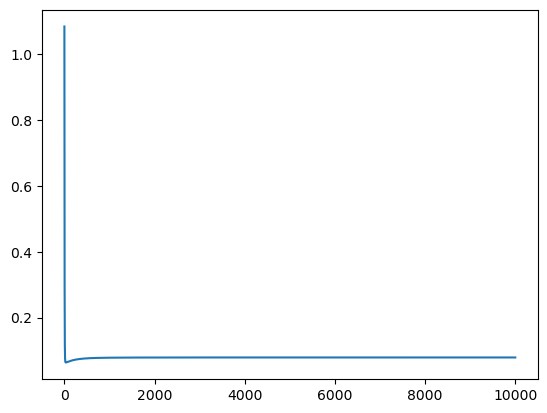

In [9]:
# loss curve visualization
log = np.array(log)
plt.plot(log[:,0],log[:,1])

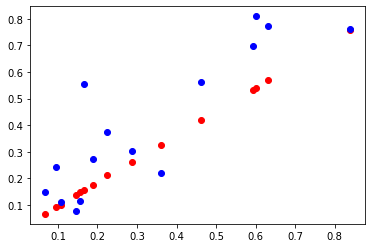

In [9]:
# visualization
y_pred = np.matmul(X_test, w)
plt.scatter(X_test[:,0],y_pred,c='r')
plt.scatter(X_test[:,0],y_test,c='b')

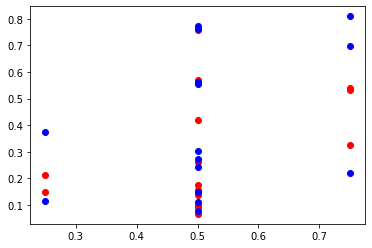

In [10]:
plt.scatter(X_test[:,1],y_pred,c='r')
plt.scatter(X_test[:,1],y_test,c='b')